In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:

#TO DO: get the data, split between train and test sets
# we use MNIST dataset, 0-9 handwrittend digits
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#TO DO: check the type and shape of the subsets
print("X Type: ", type(x_train))
print("X Shape: ", x_train.shape)
print("Y Type: ", type(y_train))
print("Y Shape: ", y_train.shape)

print("Classes: ", np.unique(y_train))

print("Dataset Record Shape: ", x_train[0].shape)
print("Dataset Record Data:\n", x_train[0])

X Type:  <class 'numpy.ndarray'>
X Shape:  (60000, 28, 28)
Y Type:  <class 'numpy.ndarray'>
Y Shape:  (60000,)
Classes:  [0 1 2 3 4 5 6 7 8 9]
Dataset Record Shape:  (28, 28)
Dataset Record Data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64  

In [3]:
#Visualization of an image:

import matplotlib.pyplot as plt

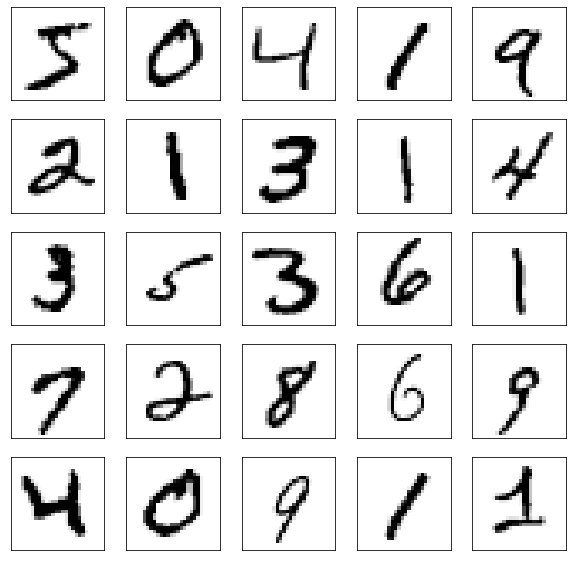

In [4]:
#Visualization of a grid of images:

plt.figure(figsize=(10,10))
for i,image in enumerate(x_train[0:25]):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap='Greys')


In [5]:
# TO DO: reshaping: how?
# 
# The new shape should be a 2d array having 60000 records described as 1d arrays
# 

features_vector_lenght = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], features_vector_lenght))
x_test = x_test.reshape((x_test.shape[0], features_vector_lenght))

print("X Train Shape: ", x_train.shape)
print("X Test Shape: ", x_test.shape)

X Train Shape:  (60000, 784)
X Test Shape:  (10000, 784)


In [6]:
#TO DO: normalization in [0,1]

# print actual value type 
print(type(x_train[0][0]))


#normalize x_train values
#normalize x_test values
x_train = x_train.astype("float32")/255   # max value of a cell
x_test = x_test.astype("float32")/255   # max value of a cell

#print new values type
print(type(x_train[0][0]))
print(type(x_test[0][0]))

# print new x_train[0]
print(x_train[0])

<class 'numpy.uint8'>
<class 'numpy.float32'>
<class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [7]:
num_classes = 10

In [8]:
#TO DO: model


vanilla_model = keras.Sequential()

# with explicit input layer
vanilla_model.add(
    layers.InputLayer(
        input_shape=(features_vector_lenght,)
    )
)

vanilla_model.add(
    layers.Dense(
        num_classes,
        activation='Softmax'
    )
)

print("Explicit: ")
vanilla_model.summary()

# with inplicit input layer
vanilla_model_inplicit = keras.Sequential()
vanilla_model_inplicit.add(
    layers.Dense(
        num_classes, 
        activation='Softmax', 
        input_shape=(784, )
    )
)

print("\nInplicit: ")
vanilla_model_inplicit.summary()


Explicit: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

Inplicit: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-03-31 16:14:47.197516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 16:14:47.197530: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 16:14:47.197540: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (80d80221f392): /proc/driver/nvidia/version does not exist
2022-03-31 16:14:47.197659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



**IMPORTANT NOTE**

Multi-layer neural networks with standard activation functions output scores that could assume any real value which may be difficult to work with.

For this reason it is usual to append a softmax function as activation function of the final layer.

Softmax converts the scores to a normalized probability distribution, which is understandable by humans. It can be displayed as final result or used as input to other systems. 

**Softmax**

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1, which can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1. (The high value will have the higher probability than other values.)


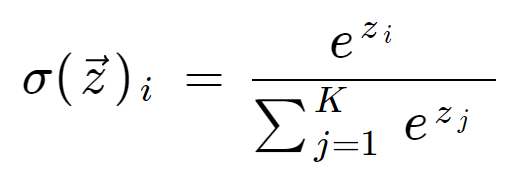

In [9]:
from scipy.special import softmax
x = [5,6,-3,5,-0.7,4]
print(softmax(x))
print(np.sum(softmax(x)))

[1.96469726e-01 5.34060086e-01 6.59082506e-05 1.96469726e-01
 6.57380917e-04 7.22771730e-02]
0.9999999999999998


In [10]:
#TO DO : compile and fit
batch_size = 128
epochs     = 15
#crossentropy

vanilla_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = vanilla_model.fit(
    x_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.1
) 

2022-03-31 16:14:47.367958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
422/422 [==============================] - 0s 640us/step - loss: 0.6958 - accuracy: 0.8298 - val_loss: 0.3481 - val_accuracy: 0.9138
Epoch 2/15
422/422 [==============================] - 0s 488us/step - loss: 0.3766 - accuracy: 0.8988 - val_loss: 0.2836 - val_accuracy: 0.9262
Epoch 3/15
422/422 [==============================] - 0s 479us/step - loss: 0.3310 - accuracy: 0.9094 - val_loss: 0.2603 - val_accuracy: 0.9293
Epoch 4/15
422/422 [==============================] - 0s 500us/step - loss: 0.3096 - accuracy: 0.9141 - val_loss: 0.2503 - val_accuracy: 0.9310
Epoch 5/15
422/422 [==============================] - 0s 495us/step - loss: 0.2970 - accuracy: 0.9177 - val_loss: 0.2414 - val_accuracy: 0.9338
Epoch 6/15
422/422 [==============================] - 0s 499us/step - loss: 0.2879 - accuracy: 0.9200 - val_loss: 0.2365 - val_accuracy: 0.9330
Epoch 7/15
422/422 [==============================] - 0s 482us/step - loss: 0.2817 - accuracy: 0.9214 - val_loss: 0.2321 - val_accuracy:

**ABUT LOSS FUNCTIONS...**

Cross-Entropy (or log loss) -   It is a measure of the degree of dissimilarities between two probability distribution

In particular Sparse Categorical Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

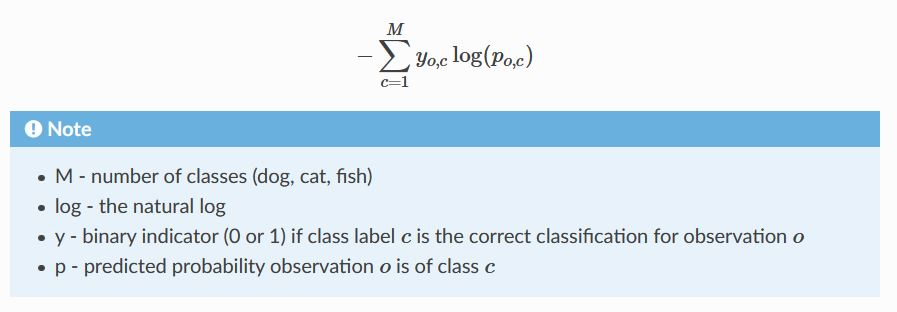

In [11]:
#TO DO: evaluate
score = vanilla_model.evaluate(x_test, y_test)

print("Score: ", score)
print("Metrics: ", vanilla_model.metrics_names)

print("Test Loss:     ", score[0])
print("Test Accuracy: ", score[1])

#TO DO: predict class
prediction = vanilla_model.predict(x_test[:1])
pred_classe = np.argmax(prediction)

print("Prediction: \n", prediction)
print("Class Prediction: ", pred_classe)
print("Real Class: ", y_test[0])

313/313 [==============================] - 0s 227us/step - loss: 0.2645 - accuracy: 0.9265
Score:  [0.2644881010055542, 0.9265000224113464]
Metrics:  ['loss', 'accuracy']
Test Loss:      0.2644881010055542
Test Accuracy:  0.9265000224113464
Prediction: 
 [[4.0509744e-06 3.1555675e-11 9.5751911e-06 4.5185033e-03 3.8727555e-07
  1.7125843e-05 5.6042815e-10 9.9511421e-01 1.8423831e-05 3.1775123e-04]]
Class Prediction:  7
Real Class:  7


(28, 28)


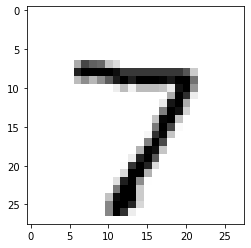

In [12]:
#just checking if the record has been classified correctly
import matplotlib.pyplot as plt
x_test_vis = x_test[0].reshape(28, 28)
print(x_test_vis.shape)
plt.imshow(x_test_vis, cmap = plt.cm.binary)

In [13]:
#TO DO: add more layers
model = keras.Sequential()
model.add(
    layers.Dense(
        512, 
        activation='relu', 
        input_shape=(784, )
    )
)
model.add(
    layers.Dense(
        256, 
        activation='relu'
    )
)
model.add(
    layers.Dense(
        num_classes, 
        activation='Softmax'
    )
)


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size = 128
epochs = 15

#crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2421 - accuracy: 0.9284 - val_loss: 0.0974 - val_accuracy: 0.9723
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0816 - val_accuracy: 0.9760
Epoch 3/15
422/422 [==============================] - 1s 1ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 4/15
422/422 [==============================] - 1s 1ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0768 - val_accuracy: 0.9780
Epoch 5/15
422/422 [==============================] - 1s 1ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.0866 - val_accuracy: 0.9772
Epoch 6/15
422/422 [==============================] - 1s 1ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0915 - val_accuracy: 0.9768
Epoch 7/15
422/422 [==============================] - 1s 1ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0794 - val_accuracy: 0.9812
Epoch 

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

pred_prob = model.predict(x_test[:1])
print(pred_prob)
#np.argmax(pred_prob[0])
print(np.argmax(pred_prob[0]))

Test loss: 0.09099519997835159
Test accuracy: 0.9814000129699707
[[1.5797578e-15 9.0199701e-13 1.0562201e-12 3.7537128e-13 2.0318061e-19
  1.0963846e-15 3.7424559e-19 1.0000000e+00 2.8865856e-14 1.8222771e-10]]
7


In [17]:
history

In [18]:
history.history

{'loss': [0.24208872020244598,
  0.08767340332269669,
  0.054400455206632614,
  0.039703186601400375,
  0.02696080692112446,
  0.023107929155230522,
  0.017469191923737526,
  0.015876535326242447,
  0.015515197068452835,
  0.011279461905360222,
  0.00998879224061966,
  0.014364446513354778,
  0.009628303349018097,
  0.007020961958914995,
  0.010533026419579983],
 'accuracy': [0.928351879119873,
  0.9728518724441528,
  0.9829444289207458,
  0.9873148202896118,
  0.9908148050308228,
  0.992388904094696,
  0.9942777752876282,
  0.9949259161949158,
  0.9947407245635986,
  0.9962407350540161,
  0.9967592358589172,
  0.9950925707817078,
  0.9965000152587891,
  0.9977407455444336,
  0.9966481328010559],
 'val_loss': [0.09744006395339966,
  0.0816459059715271,
  0.07146204262971878,
  0.07677798718214035,
  0.08657889813184738,
  0.09147104620933533,
  0.07939133048057556,
  0.07683940976858139,
  0.07208342850208282,
  0.10444841533899307,
  0.08341039717197418,
  0.08311431854963303,
  0.090

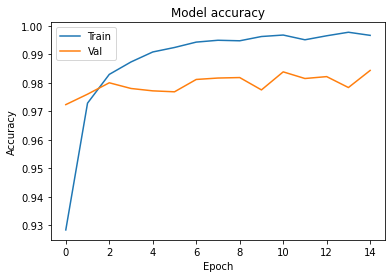

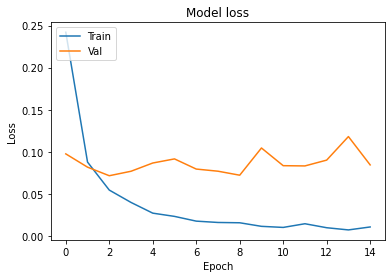

In [19]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## HOMEWORK

Build, train and test a MLP classification model for the letters MNIST dataset. This dataset is very similar to the one used in the code above, but it has 26 classes instead of 10. 

You can install and load the emnist dataset with the following lines (https://libraries.io/pypi/emnist)


In [20]:
!pip install emnist

### Intro

Showing the list of aviable datasets

In [21]:
from emnist import list_datasets

list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

Import the emnist function for extracting train and testing data

In [22]:
from emnist import extract_training_samples, extract_test_samples

# extracting training set and testing set
x_train, y_train = extract_training_samples('letters')
x_test, y_test   = extract_test_samples('letters')

In [23]:
print("TRAINING")
print(x_train.shape, "x_train, ", y_train.shape, "y_train")
print("Labels (unique): ", np.unique(y_train))

print("TESTING")
print(x_test.shape, "x_train, ", y_test.shape, "y_train")

print("\nData Element: \n", x_train[0])

TRAINING
(124800, 28, 28) x_train,  (124800,) y_train
Labels (unique):  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
TESTING
(20800, 28, 28) x_train,  (20800,) y_train

Data Element: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0
    0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0
    0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5
   

Plot some dataset images

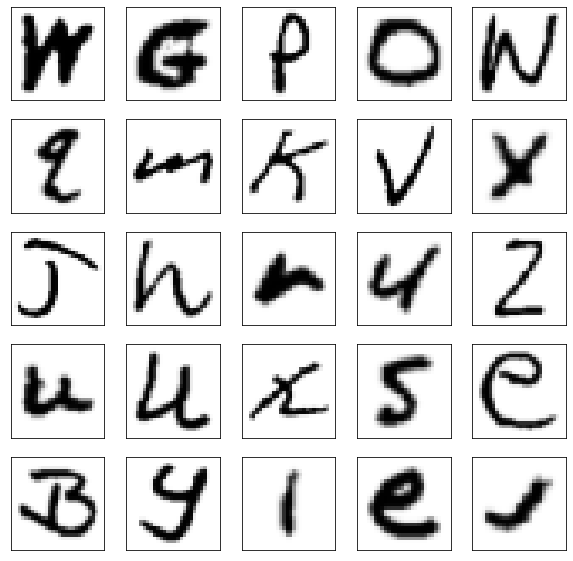

In [24]:
#Visualization of a grid of images:

plt.figure(figsize=(10,10))
for i,image in enumerate(x_train[0:25]):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap='Greys')

### Preparing data

Reshaping the train ad test sets

In [25]:
feature_vector_lenght = x_train.shape[1] * x_train.shape[2]
print(feature_vector_lenght)

x_train = x_train.reshape(x_train.shape[0], feature_vector_lenght)
x_test  = x_test.reshape(x_test.shape[0], feature_vector_lenght)

print(x_train.shape)
print(x_test.shape)

784
(124800, 784)
(20800, 784)


Normalizing data

In [26]:
print("Type Train: ", type(x_train[0][0]))
print("Type Test: ", type(x_test[0][0]))


Type Train:  <class 'numpy.uint8'>
Type Test:  <class 'numpy.uint8'>


In [27]:
x_train = x_train.astype("float32")/255
x_test  = x_test.astype("float32")/255

print(type(x_train[0][0]))
print(type(x_test[0][0]))

<class 'numpy.float32'>
<class 'numpy.float32'>


In [28]:
x_train[0]
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Fix the labels. We have lables from 1 to 26 (1-26) and tensorflow needs labels starting from 0 (0-25)

In [29]:
y_train = y_train - 1   # -1 to all elements
y_test  = y_test - 1

In [30]:
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [31]:
num_classes = len(np.unique(y_train))

### First Model Generation

Making a simple model

In [32]:
model = keras.Sequential()

# with explicit input layer
model.add(
    layers.InputLayer(
        input_shape=(feature_vector_lenght, )
    )
)
model.add(
    layers.Dense(
        num_classes, 
        activation="Softmax"
    )
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 26)                20410     
Total params: 20,410
Trainable params: 20,410
Non-trainable params: 0
_________________________________________________________________


Compile and training

In [33]:
#TO DO : compile and fit
batch_size = 128
epochs = 15
#crossentropy

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/15
878/878 [==============================] - 1s 578us/step - loss: 1.3357 - accuracy: 0.6340 - val_loss: 1.1106 - val_accuracy: 0.6906
Epoch 2/15
878/878 [==============================] - 1s 594us/step - loss: 1.0766 - accuracy: 0.6983 - val_loss: 1.0730 - val_accuracy: 0.7002
Epoch 3/15
878/878 [==============================] - 0s 535us/step - loss: 1.0465 - accuracy: 0.7089 - val_loss: 1.0561 - val_accuracy: 0.7114
Epoch 4/15
878/878 [==============================] - 0s 498us/step - loss: 1.0308 - accuracy: 0.7146 - val_loss: 1.0436 - val_accuracy: 0.7150
Epoch 5/15
878/878 [==============================] - 0s 536us/step - loss: 1.0207 - accuracy: 0.7168 - val_loss: 1.0391 - val_accuracy: 0.7140
Epoch 6/15
878/878 [==============================] - 1s 583us/step - loss: 1.0131 - accuracy: 0.7200 - val_loss: 1.0378 - val_accuracy: 0.7172
Epoch 7/15
878/878 [==============================] - 0s 527us/step - loss: 1.0068 - accuracy: 0.7211 - val_loss: 1.0362 - val_accuracy:

Evaluation

In [34]:
score = model.evaluate(x_test,y_test)
print(score)
print(model.metrics_names)

print("Test loss: ",score[0])
print("Test Accuracy: ",score[1])

#TO DO: predict class
pred_prob = model.predict(x_test[:1])
print("predicition of test[0]: ",pred_prob)
pred_classes = np.argmax(pred_prob)
print("predcicted class: ",pred_classes)
print("actual calss:",y_test[0])

650/650 [==============================] - 0s 406us/step - loss: 1.0172 - accuracy: 0.7238
[1.0171586275100708, 0.7237980961799622]
['loss', 'accuracy']
Test loss:  1.0171586275100708
Test Accuracy:  0.7237980961799622
predicition of test[0]:  [[8.43938962e-02 5.54497063e-04 3.48681388e-05 5.24058272e-08
  5.41129947e-01 1.21973775e-01 6.41352916e-03 3.39672938e-02
  2.29930386e-09 1.16411351e-12 1.34114102e-01 2.52425502e-06
  1.35360621e-02 1.37094371e-02 4.37991548e-06 1.88022091e-06
  1.10756466e-02 1.59878395e-02 4.44797266e-08 1.08434102e-02
  1.49131380e-03 3.75818898e-04 6.29544212e-03 6.30272843e-05
  4.03130800e-03 2.95456868e-08]]
predcicted class:  4
actual calss: 0


### Second Better Model

In [35]:
b_model = keras.Sequential()

b_model.add(
    layers.InputLayer(
        input_shape=(feature_vector_lenght, )
    )
)
b_model.add(
    layers.Dense(
        512, 
        activation='relu'
    )
)
b_model.add(
    layers.Dense(
        256, 
        activation='relu'
    )
)
b_model.add(
    layers.Dense(
        num_classes, 
        activation='Softmax'
    )
)

b_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 26)                6682      
Total params: 539,930
Trainable params: 539,930
Non-trainable params: 0
_________________________________________________________________


Compile and training

In [36]:
batch_size = 128
epochs     = 15

#crossentropy
b_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = b_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
878/878 [==============================] - 2s 2ms/step - loss: 0.6345 - accuracy: 0.8088 - val_loss: 0.3778 - val_accuracy: 0.8823
Epoch 2/15
878/878 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8952 - val_loss: 0.3130 - val_accuracy: 0.9015
Epoch 3/15
878/878 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9153 - val_loss: 0.2960 - val_accuracy: 0.9032
Epoch 4/15
878/878 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9261 - val_loss: 0.2824 - val_accuracy: 0.9103
Epoch 5/15
878/878 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9341 - val_loss: 0.2928 - val_accuracy: 0.9101
Epoch 6/15
878/878 [==============================] - 1s 2ms/step - loss: 0.1634 - accuracy: 0.9415 - val_loss: 0.2690 - val_accuracy: 0.9143
Epoch 7/15
878/878 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9462 - val_loss: 0.2818 - val_accuracy: 0.9171
Epoch 

In [37]:
history.history

{'loss': [0.6344936490058899,
  0.32104283571243286,
  0.256834477186203,
  0.21581415832042694,
  0.18704497814178467,
  0.16335485875606537,
  0.14548103511333466,
  0.12864796817302704,
  0.11839482188224792,
  0.10942016541957855,
  0.10005449503660202,
  0.09048482775688171,
  0.08836447447538376,
  0.08334927260875702,
  0.08016666769981384],
 'accuracy': [0.8087517619132996,
  0.895174503326416,
  0.9153223037719727,
  0.9260861873626709,
  0.9341078996658325,
  0.9414529800415039,
  0.9462339878082275,
  0.9520121216773987,
  0.953855037689209,
  0.9574252367019653,
  0.9606214165687561,
  0.9638977646827698,
  0.9640936851501465,
  0.9656873345375061,
  0.9668002128601074],
 'val_loss': [0.3778039813041687,
  0.3129921555519104,
  0.2960227131843567,
  0.28235572576522827,
  0.29278963804244995,
  0.269013911485672,
  0.2817595899105072,
  0.28580766916275024,
  0.30084583163261414,
  0.30480635166168213,
  0.31514567136764526,
  0.33961421251296997,
  0.3580159544944763,
  0.

Evaluation

In [38]:
score = b_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

pred_prob = b_model.predict(x_test[:1])
print(pred_prob)
print(np.argmax(pred_prob[0]), y_test[0])

Test loss: 0.4192865490913391
Test accuracy: 0.9052403569221497
[[9.9144357e-01 3.0800963e-12 1.6102325e-08 4.5242522e-11 2.5632044e-05
  6.3470239e-14 8.5152183e-03 1.0970937e-14 4.6781277e-14 1.2015612e-15
  3.9990129e-17 1.0268937e-11 9.3745671e-11 2.4006068e-09 8.4543301e-12
  1.4362784e-09 3.4983777e-06 1.2009327e-05 9.2484403e-10 2.5797359e-14
  8.8845802e-09 7.7692423e-14 1.8832715e-11 3.2439371e-11 3.8200854e-14
  3.6774139e-14]]
0 0


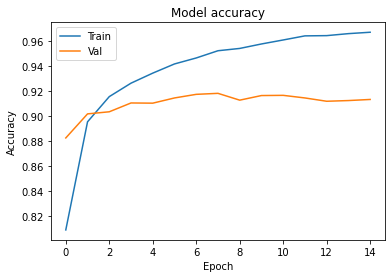

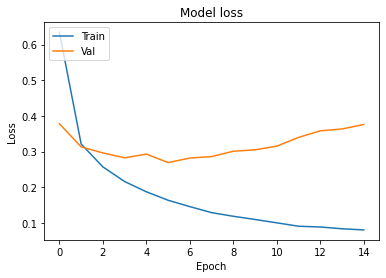

In [39]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Confusion Matrix & Precision-Recall

Calculating the confusion matrix

20800 20800


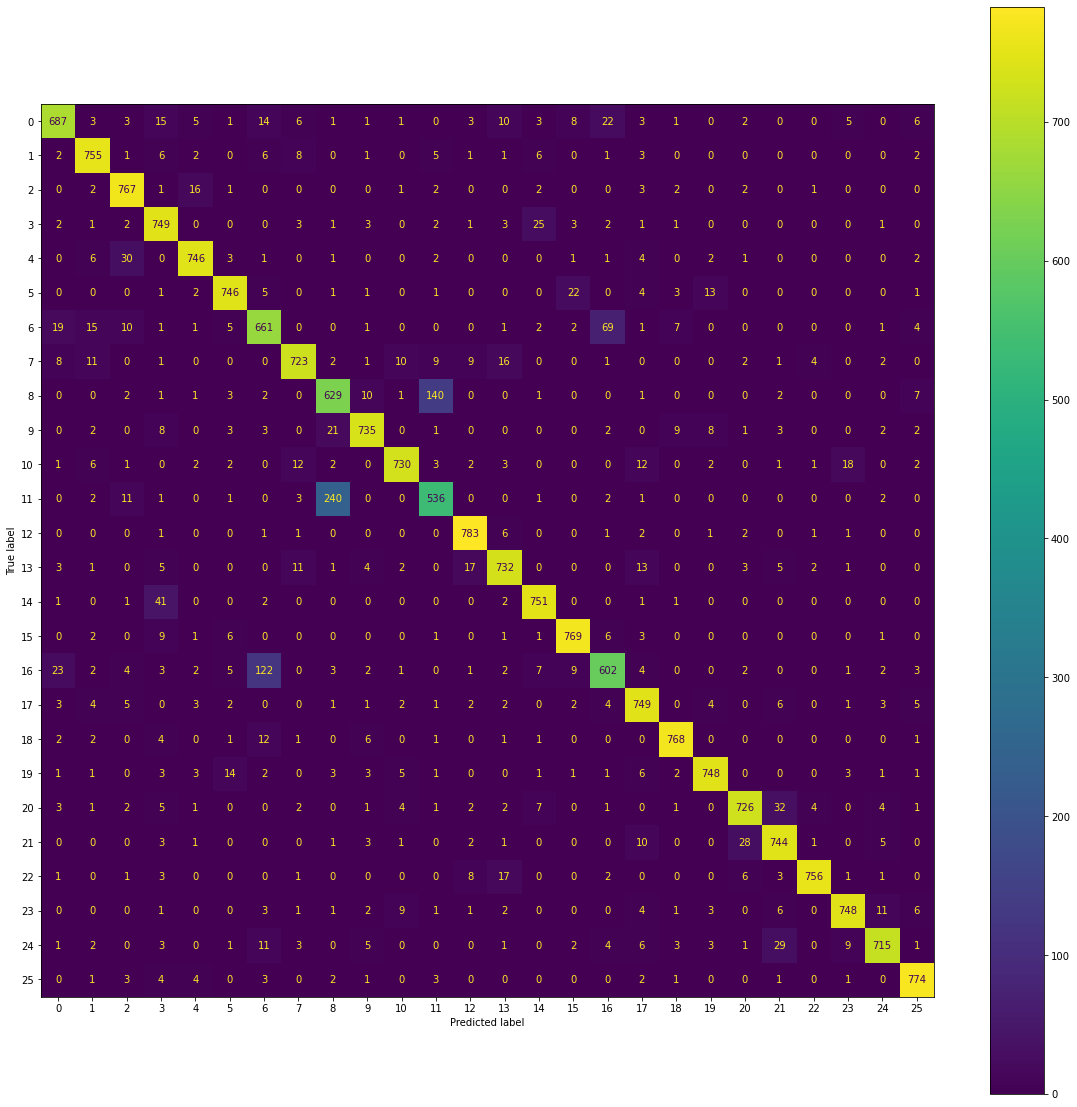

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = b_model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]   # have to compute argmax for all items

print(len(y_pred), len(y_test))

cm = confusion_matrix(y_test, y_pred) 
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

Computing precision and recoll per-class and macro

In [41]:
from sklearn.metrics import recall_score, precision_score

per_class_precision = precision_score(y_test, y_pred, average=None)
print('Per-class precision score:\n', per_class_precision)

per_class_recall = recall_score(y_test, y_pred, average=None)
print('Per-class recall score:\n', per_class_recall)

macro_precision = precision_score(y_test, y_pred, average='macro')
print('Macro precision score:', macro_precision)

macro_class_recall = recall_score(y_test, y_pred, average='macro')
print('Macro recall score:', macro_class_recall)

Per-class precision score:
 [0.90752972 0.92185592 0.90984579 0.86191024 0.9443038  0.9395466
 0.77948113 0.93290323 0.69120879 0.94110115 0.9517601  0.75492958
 0.94110577 0.91158157 0.92945545 0.93894994 0.83495146 0.89915966
 0.96       0.95408163 0.93556701 0.89315726 0.98181818 0.94803549
 0.95206391 0.94621027]
Per-class recall score:
 [0.85875 0.94375 0.95875 0.93625 0.9325  0.9325  0.82625 0.90375 0.78625
 0.91875 0.9125  0.67    0.97875 0.915   0.93875 0.96125 0.7525  0.93625
 0.96    0.935   0.9075  0.93    0.945   0.935   0.89375 0.9675 ]
Macro precision score: 0.9062505252897772
Macro recall score: 0.9052403846153847


### More Deep Model

In [42]:
d_model = keras.Sequential()

d_model.add(
    layers.InputLayer(
        input_shape=(feature_vector_lenght, )
    )
)
d_model.add(
    layers.Dense(
        512, 
        activation='relu'
    )
)
d_model.add(
    layers.Dense(
        256, 
        activation='relu'
    )
)
d_model.add(
    layers.Dense(
        128, 
        activation='relu'
    )
)
d_model.add(
    layers.Dense(
        64, 
        activation='relu'
    )
)
d_model.add(
    layers.Dense(
        32, 
        activation='relu'
    )
)

d_model.add(
    layers.Dense(
        num_classes, 
        activation='Softmax'
    )
)

d_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 26)                858       
Total params: 577,338
Trainable params: 577,338
Non-trainable params: 0
________________________________________________

In [43]:
batch_size = 128
epochs     = 45

#crossentropy
d_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = b_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9679 - val_loss: 0.3823 - val_accuracy: 0.9155
Epoch 2/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9699 - val_loss: 0.3888 - val_accuracy: 0.9147
Epoch 3/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9704 - val_loss: 0.3885 - val_accuracy: 0.9179
Epoch 4/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9708 - val_loss: 0.4221 - val_accuracy: 0.9131
Epoch 5/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9723 - val_loss: 0.4197 - val_accuracy: 0.9155
Epoch 6/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9739 - val_loss: 0.4095 - val_accuracy: 0.9155
Epoch 7/45
878/878 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9736 - val_loss: 0.4362 - val_accuracy: 0.9160
Epoch 

In [44]:
history.history

{'loss': [0.07696802914142609,
  0.07215626537799835,
  0.07084035128355026,
  0.06920549273490906,
  0.06516748666763306,
  0.06183002144098282,
  0.06253542006015778,
  0.06403354555368423,
  0.05949106067419052,
  0.05707786977291107,
  0.05914605036377907,
  0.056424323469400406,
  0.05446317419409752,
  0.055064376443624496,
  0.05523379519581795,
  0.05466494709253311,
  0.0517936572432518,
  0.0545477531850338,
  0.05009837448596954,
  0.048368245363235474,
  0.04918915778398514,
  0.04986469820141792,
  0.05153534188866615,
  0.046215228736400604,
  0.050800926983356476,
  0.04700295999646187,
  0.04679827019572258,
  0.04658122360706329,
  0.04765864834189415,
  0.04473103582859039,
  0.04421372711658478,
  0.04600079357624054,
  0.04386698082089424,
  0.04543950408697128,
  0.04417610168457031,
  0.04140805825591087,
  0.04265711084008217,
  0.04185274615883827,
  0.04241042956709862,
  0.045984115451574326,
  0.03872068598866463,
  0.04249222204089165,
  0.039819616824388504

In [45]:
score = d_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

pred_prob = d_model.predict(x_test[:1])
print(pred_prob)
print(np.argmax(pred_prob[0]), y_test[0])

Test loss: 3.2610929012298584
Test accuracy: 0.029567306861281395
[[0.03953713 0.04043188 0.04024708 0.04260175 0.04379496 0.04418538
  0.03936215 0.03501832 0.03585957 0.04092708 0.03681211 0.03111931
  0.04324429 0.03512312 0.04395455 0.03131398 0.04460546 0.03157335
  0.03689025 0.03120783 0.03504913 0.04041206 0.04011355 0.0375131
  0.04321733 0.03588524]]
16 0


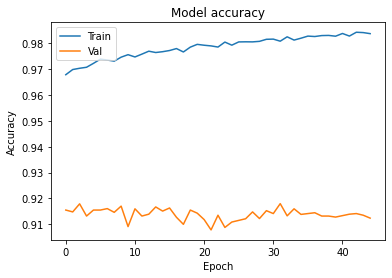

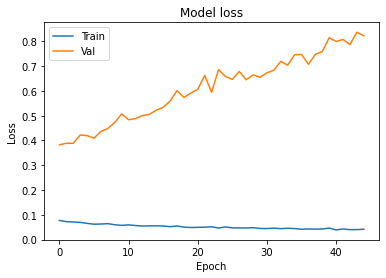

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

20800 20800


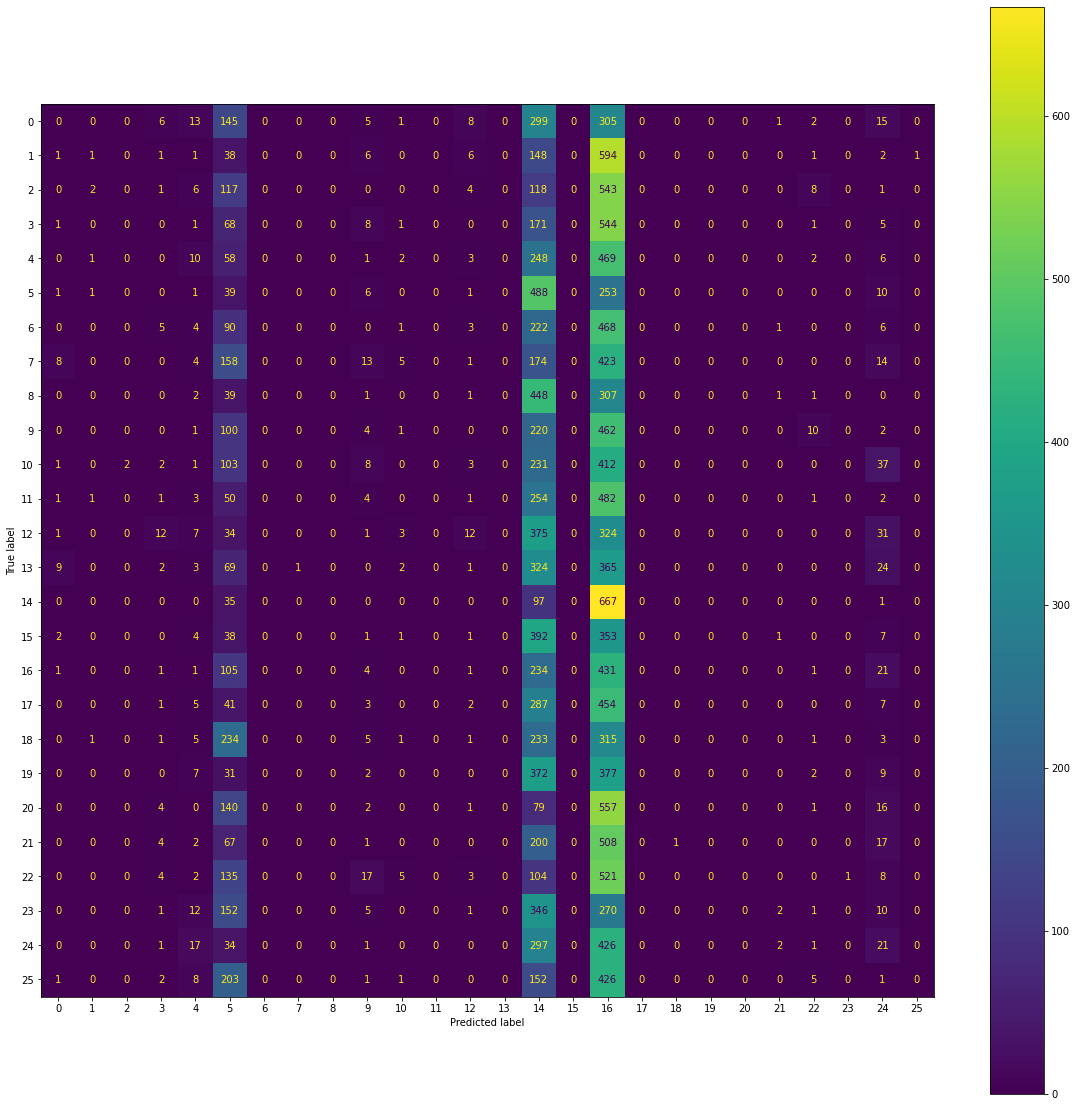

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = d_model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]   # have to compute argmax for all items

print(len(y_pred), len(y_test))

cm = confusion_matrix(y_test, y_pred) 
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [48]:
per_class_precision = precision_score(y_test, y_pred, average=None)
print('Per-class precision score:\n', per_class_precision)

per_class_recall = recall_score(y_test, y_pred, average=None)
print('Per-class recall score:\n', per_class_recall)

macro_precision = precision_score(y_test, y_pred, average='macro')
print('Macro precision score:', macro_precision)

macro_class_recall = recall_score(y_test, y_pred, average='macro')
print('Macro recall score:', macro_class_recall)

Per-class precision score:
 [0.         0.14285714 0.         0.         0.08333333 0.01678864
 0.         0.         0.         0.04040404 0.         0.
 0.22222222 0.         0.01489329 0.         0.03829069 0.
 0.         0.         0.         0.         0.         0.
 0.07608696 0.        ]
Per-class recall score:
 [0.      0.00125 0.      0.      0.0125  0.04875 0.      0.      0.
 0.005   0.      0.      0.015   0.      0.12125 0.      0.53875 0.
 0.      0.      0.      0.      0.      0.      0.02625 0.     ]
Macro precision score: 0.02441831963370154
Macro recall score: 0.02956730769230769


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
